In [1]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Reading the csv file
df = pd.read_csv('ames.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#Filling Nan values with 'None' to avoid errors
df = df.fillna('None')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


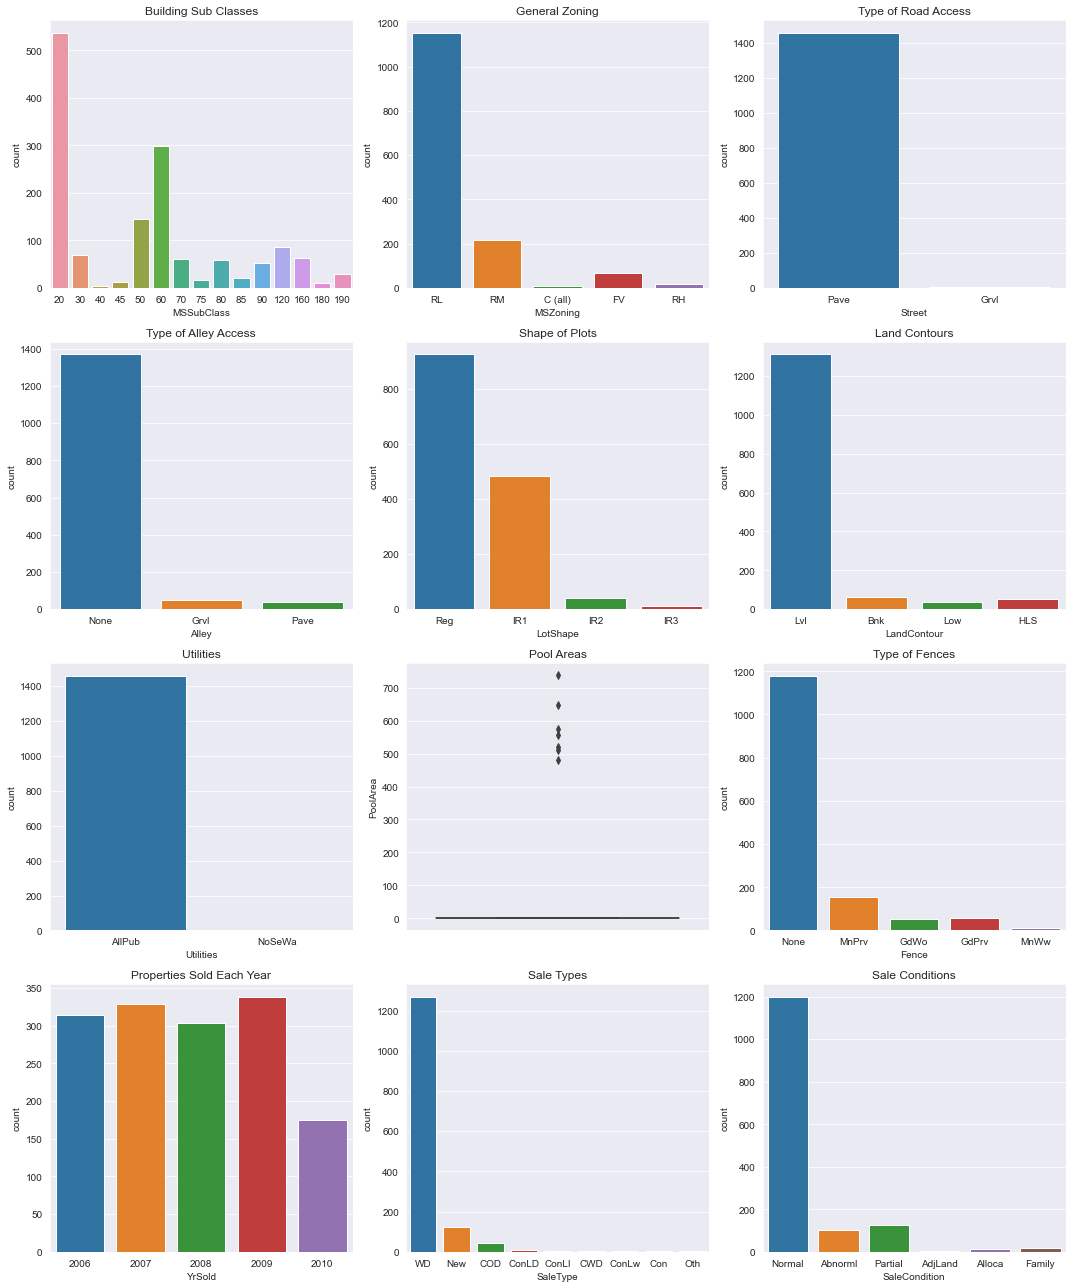

In [25]:
#Summary Statistics of different features in the dataset
#Creating the plot
fig, axes = plt.subplots(4,3, figsize=(15,18))
fig.set_tight_layout(True)
sns.set_style('darkgrid')

#Plotting the data
sns.countplot(x='MSSubClass', data=df, ax=axes[0,0])
axes[0,0].set_title('Building Sub Classes')
sns.countplot(x='MSZoning', data=df, ax=axes[0,1])
axes[0,1].set_title('General Zoning')
sns.countplot(x='Street', data=df, ax=axes[0,2])
axes[0,2].set_title('Type of Road Access')
sns.countplot(x='Alley', data=df, ax=axes[1,0])
axes[1,0].set_title('Type of Alley Access')
sns.countplot(x='LotShape', data=df, ax=axes[1,1])
axes[1,1].set_title('Shape of Plots')
sns.countplot(x='LandContour', data=df, ax=axes[1,2])
axes[1,2].set_title('Land Contours')
sns.countplot(x='Utilities', data=df, ax=axes[2,0])
axes[2,0].set_title('Utilities')
sns.boxplot(y='PoolArea', data=df, ax=axes[2,1])
axes[2,1].set_title('Pool Areas')
sns.countplot(x='Fence', data=df, ax=axes[2,2])
axes[2,2].set_title('Type of Fences')
sns.countplot(x='YrSold', data=df, ax=axes[3,0])
axes[3,0].set_title('Properties Sold Each Year')
sns.countplot(x='SaleType', data=df, ax=axes[3,1])
axes[3,1].set_title('Sale Types')
sns.countplot(x='SaleCondition', data=df, ax=axes[3,2])
axes[3,2].set_title('Sale Conditions');

Above is a summary of various features in the dataset. The Plots aim to show the distribution of elements in these features from the most occuring to the least occuring.

## TotRmsAbvGrd, OverallCondition and  SalePrice

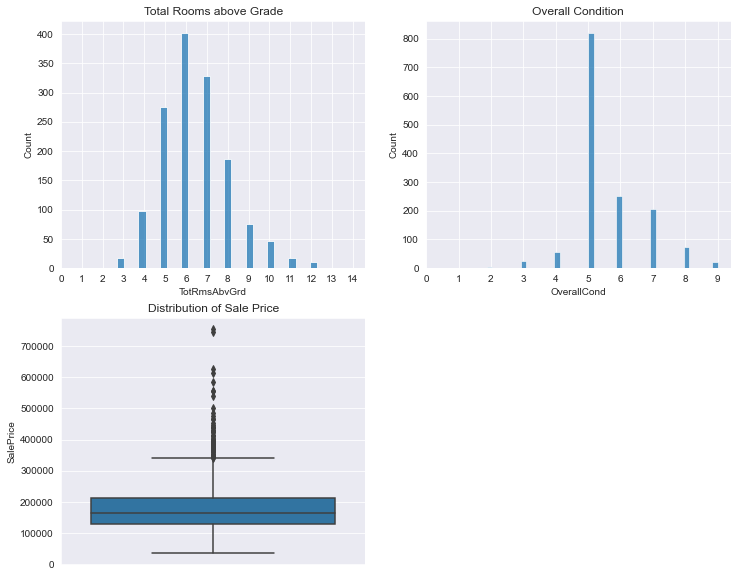

In [5]:
#Distribution of TotRmsAbvGrd, OverallCond and SalePrice
plt.figure(figsize=(12,10))
plt.tight_layout()

xticks = np.arange(0,10,1)
xticks2 = np.arange(0,15,1)

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)

sns.histplot(x='TotRmsAbvGrd',data=df, ax=ax1)
ax1.set_xticks(xticks2)
ax1.set_title('Total Rooms above Grade')
sns.histplot(x='OverallCond',data=df, ax=ax2)
ax2.set_xticks(xticks)
ax2.set_title('Overall Condition')
sns.boxplot(y = 'SalePrice', data=df, ax=ax3)
ax3.set_title('Distribution of Sale Price');

Above we have focused on 'TotRmsAbvGrd', 'OverallCondition' and 'SalePrice'. The histograms show the frequency of elements in these features and the SalePrice Boxplot aims to show the range of SalePrice.

The distribution of SalePrice appears to be positively skewed, with most prices concentrated towards the lower end.

The distribution TotRmsAbGrd is roughly symmetric, with a majority of houses having around 6-7 rooms above ground.

The distribution of OverallCond indicates that most houses have an overall condition rating of around 5-6, suggesting an average condition.

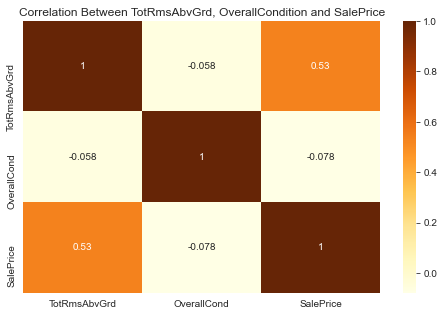

In [6]:
#Creating a new dataset to find correlation between the three elements
new_data = df[['TotRmsAbvGrd', 'OverallCond', 'SalePrice']]
corr_matrix = new_data.corr()
#Plotting the result
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Between TotRmsAbvGrd, OverallCondition and SalePrice');

The Heatmap above has been used to show correlation between the three features. We can see they have no correlation at all

### Summary Statistics of OverallCondition

In [7]:
#OverallCondition Summary
describe = df['OverallCond'].describe()
mode = df['OverallCond'].mode()
median = df['OverallCond'].median()
print(f"Overall Condition Statistics\n{describe}\nMode: {mode}\nMedian: {median}")

Overall Condition Statistics
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
Mode: 0    5
dtype: int64
Median: 5.0


### Summary Statistics of Total Rooms Above Grade

In [8]:
#TotRmsAbvGrd Summary
describe = df['TotRmsAbvGrd'].describe()
mode = df['TotRmsAbvGrd'].mode()
median = df['TotRmsAbvGrd'].median()
print(f"TotRmsAbvGrd Statistics\n{describe}\nMode: {mode}\nMedian: {median}")

TotRmsAbvGrd Statistics
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
Mode: 0    6
dtype: int64
Median: 6.0


### Summary Statistics of SalePrice

In [9]:
#SalePrice Summary
describe = df['SalePrice'].describe()
mode = df['SalePrice'].mode()
median = df['SalePrice'].median()
print(f"SalePrice Statistics\n{describe}\nMode: {mode}\nMedian: {median}")

SalePrice Statistics
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Mode: 0    140000
dtype: int64
Median: 163000.0


## Splitting Data into Subsets Based on OverallCondition

In [10]:
#Condition equal to 5
condition_equal_to_5 = df[df['OverallCond'] == 5]
condition_equal_to_5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78,9262,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2009,New,Partial,287090
1452,1453,180,RM,35,3675,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90,17217,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,None,None,None,0,10,2009,WD,Normal,185000


In [11]:
#Condition less than 5
condition_less_than_5 = df[df['OverallCond'] < 5]
condition_less_than_5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,7,2008,WD,Normal,40000
69,70,50,RL,81,15593,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,7,2006,WD,Normal,225000
88,89,50,C (all),105,8470,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,10,2009,ConLD,Abnorml,85000
91,92,20,RL,85,8500,Pave,None,Reg,Lvl,AllPub,...,0,None,GdWo,None,0,12,2006,WD,Abnorml,98600
104,105,50,RM,None,7758,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,30,RM,50,6000,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,7,2007,WD,Normal,108500
1362,1363,50,RL,None,12513,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,6,2009,WD,Normal,104900
1380,1381,30,RL,45,8212,Pave,Grvl,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,58500
1398,1399,50,RL,60,7200,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,None,0,5,2009,WD,Normal,138000


In [12]:
#Condition greater than 5
condition_greater_than_5 = df[df['OverallCond'] > 5]
condition_greater_than_5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
7,8,60,RL,None,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
9,10,190,RL,50,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000
12,13,20,RL,None,12968,Pave,None,IR2,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,144000
15,16,45,RM,51,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,None,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1450,180,RM,21,1533,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2006,WD,Abnorml,92000
1456,1457,20,RL,85,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


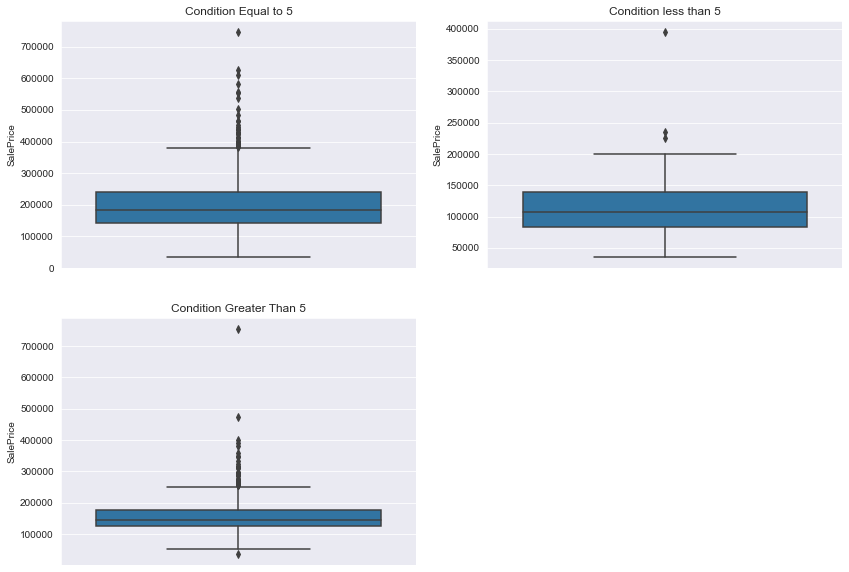

In [13]:
#Boxplots showing distribution of SalePrice on different Overall Conditions
plt.figure(figsize=(14,10))
plt.tight_layout()

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)

sns.boxplot(y='SalePrice', data=condition_equal_to_5, ax=ax1)
ax1.set_title('Condition Equal to 5')
sns.boxplot(y='SalePrice', data=condition_less_than_5, ax=ax2)
ax2.set_title('Condition less than 5')
sns.boxplot(y='SalePrice', data=condition_greater_than_5, ax=ax3)
ax3.set_title('Condition Greater Than 5');

Above are Boxplots showing how SalePrice is distributed among the three subsets. We can see that houses with a conditiion rating of 5 or higher tend to cost more than the houses with a condition rating below 5.

In [14]:
#Getting info on the dataset to find columns of type integer, create a new dataset and calculate the correlation
# of these columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

## Exploring Correlations With SalePrice

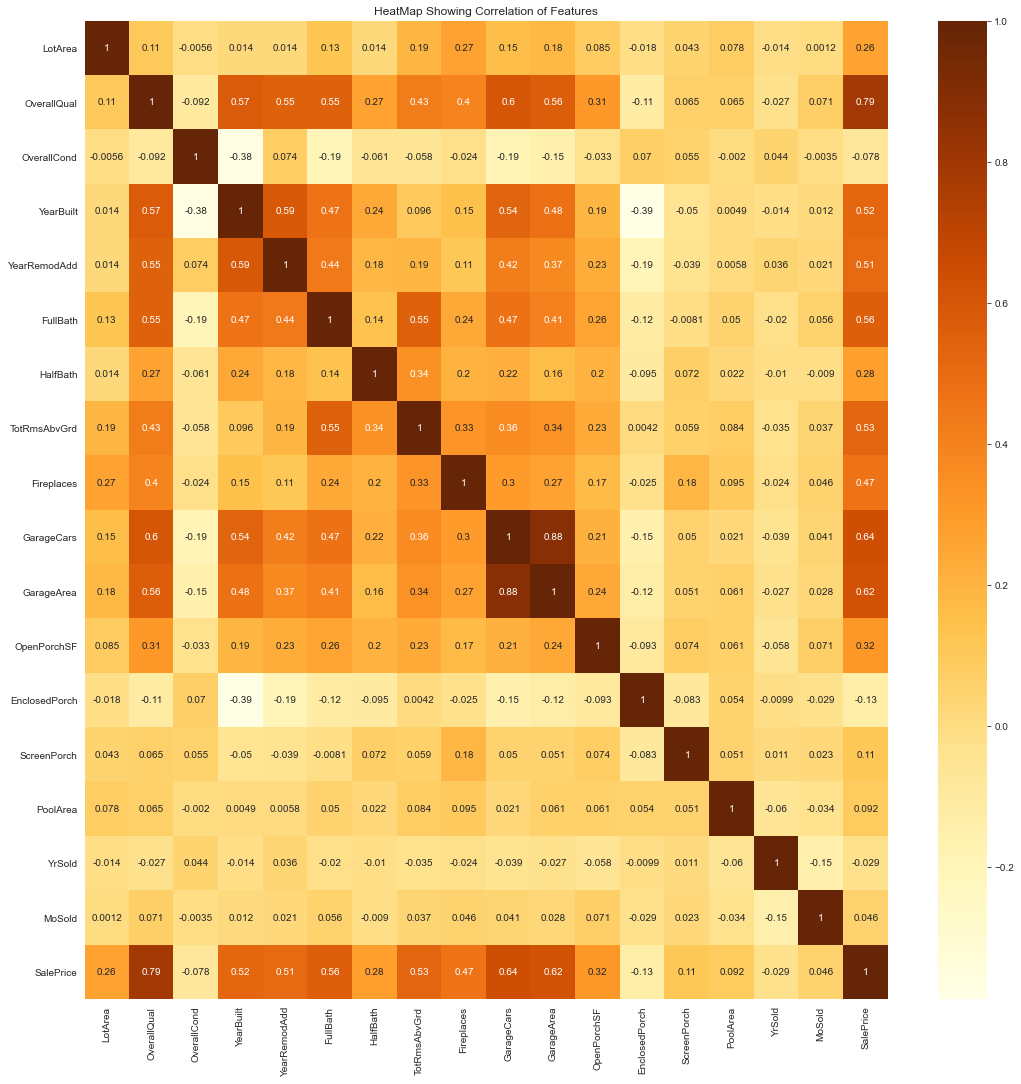

In [15]:
#New Dataset of quantitative variables only from the dataset
corr_data = df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'YrSold', 'MoSold', 'SalePrice']]
corr_data_matrix = corr_data.corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr_data_matrix, annot=True, cmap='YlOrBr')
plt.title('HeatMap Showing Correlation of Features');

From the above Heatmap, we see that 'OverallQuality' has the highest relationship with SalePrice. An increase in OverallQuality also results in an increase in SalePrice.

Garage Cars and Garage Area also have a high correlation with SalePrice.

FullBath, TotRmsAbvGrd and YearBuilt have a low correlation with SalePrice.

Below we'll Plot these results individually to have a better understanding

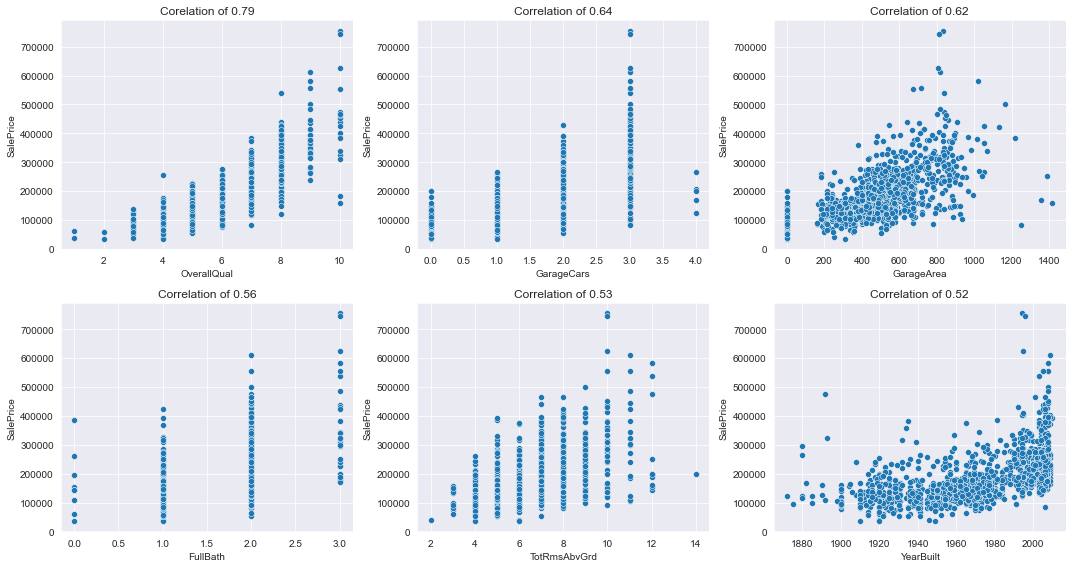

In [16]:
#Scatter plots showing correlation ofeach features
fig, axes = plt.subplots(2,3, figsize=(15,8))
fig.set_tight_layout(True)

sns.scatterplot(x='OverallQual', y='SalePrice', ax=axes[0,0], data=df)
axes[0,0].set_title('Corelation of 0.79')
sns.scatterplot(x='GarageCars', y='SalePrice', ax=axes[0,1], data=df)
axes[0,1].set_title('Correlation of 0.64')
sns.scatterplot(x='GarageArea', y='SalePrice', ax=axes[0,2], data=df)
axes[0,2].set_title('Correlation of 0.62')
sns.scatterplot(x='FullBath', y='SalePrice', ax=axes[1,0], data=df)
axes[1,0].set_title('Correlation of 0.56')
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', ax=axes[1,1], data=df)
axes[1,1].set_title('Correlation of 0.53')
sns.scatterplot(x='YearBuilt', y='SalePrice', ax=axes[1,2], data=df)
axes[1,2].set_title('Correlation of 0.52');

Above are ScatterPlots showing Correlation between the features. As we can see, the 'OverallQuality' vs 'SalePrice' ScatterPlot shows a more steady positive rise as compared to all the others.

## Engineering a New Feature

In [17]:
#Creating a new column 'Age' which is a result of Year Sold - Year Built
df['Age'] = df['YrSold'] - df['YearBuilt']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,8


In [18]:
#Correlation of Age with SalePrice
df['Age'].corr(df['SalePrice'])

-0.5233504175468158

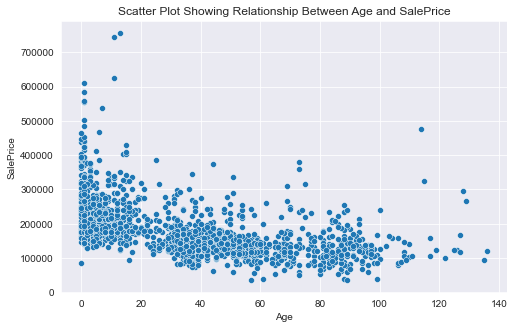

In [19]:
#ScatterPlot Showing correlation between Age and SalePrice
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='SalePrice', data=df)
plt.title('Scatter Plot Showing Relationship Between Age and SalePrice');

From the above Scatter Plot we can see that when the houses are new, price is highest while when houses are old, price is lowest